<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/EnergyBalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).

In [ ]:
%%capture
!pip install neqsim

# Energy balance for a closed system


The following example demonstrates simultion of a open system at constant pressure with a heat input source. The volume of the system is calculated as function of time.

The energy balance is a fundamental principle in thermodynamics that governs the transfer of energy between a system and its surroundings. The energy balance is expressed as an equation that relates the energy entering and leaving a system to the energy stored within the system.

There are two types of energy balances: the closed system energy balance and the open system energy balance.

The closed system energy balance applies to a system that does not exchange matter or energy with its surroundings. The energy balance for a closed system can be expressed as:

ΔE = Q - W

where ΔE is the change in the internal energy of the system, Q is the heat added to the system, and W is the work done by the system. The energy balance equation is a statement of the first law of thermodynamics, which states that energy cannot be created or destroyed, only converted from one form to another.

The open system energy balance applies to a system that exchanges matter or energy with its surroundings. The energy balance for an open system can be expressed as:

ΔE = Q - W + ΔH_in - ΔH_out

where ΔH_in is the enthalpy of the material entering the system, ΔH_out is the enthalpy of the material leaving the system, and all other terms are as defined in the closed system energy balance equation. The open system energy balance equation is a statement of the conservation of energy for a system that is not closed.

The energy balance is a fundamental tool in the analysis of energy systems, including power plants, industrial processes, and heating and cooling systems. By balancing the energy entering and leaving a system, engineers and scientists can optimize the performance of the system and ensure that it operates efficiently and reliably.

Text(0.5, 0, 'Time [sec]')

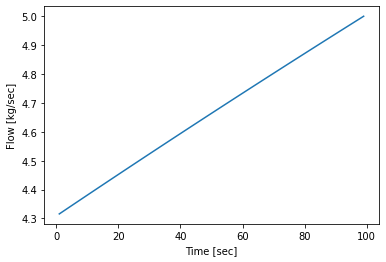

In [ ]:
import neqsim
from neqsim.thermo.thermoTools import *
 
names = ['methane']
molefractions = [1.0]
methaneFluid = createfluid2(names, molefractions)
methaneFluid.setTemperature(80.0, "C")
methaneFluid.setPressure(78.65, "barg")
methaneFluid.setTotalFlowRate(4.3, "Am3/sec")
 
TPflash(methaneFluid)
methaneFluid.initProperties()
volume = methaneFluid.getVolume("m3")
internalEnergyStart = methaneFluid.getEnthalpy("J/sec")
 
heatInput = 245*1e3 # kW
 
time = []
volume = []
step = 1 #sec
for number in range(1, 100, step):
    time.append(number)
    methaneFluid.initProperties()
    volold = methaneFluid.getVolume("m3")
    #PUflash(methaneFluid,78.65,methaneFluid.getInternalEnergy("J/sec")+heatInput*step, "barg", "J/sec")
    PHflash(methaneFluid,methaneFluid.getEnthalpy("J/sec")+heatInput*step, "J/sec")
    methaneFluid.initProperties()
    volume.append(methaneFluid.getVolume("m3"))

 
import matplotlib.pyplot as plt
 
plt.plot(time, volume)
plt.ylabel('Flow [kg/sec]')
plt.xlabel('Time [sec]')


# Energy balance for an open system


The following example demonstrates simultion of a open system at constant pressure and volume with a heat input source. The flow of gas to the souroundings are calculated as function of time.

Text(0.5, 0, 'Time [sec]')

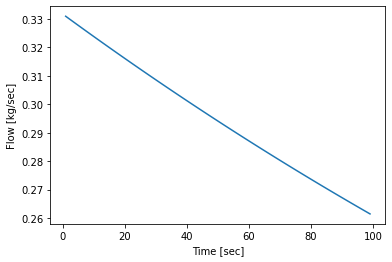

In [ ]:
import neqsim
from neqsim.thermo.thermoTools import *

names = ['methane']
molefractions = [1.0]
methaneFluid = createfluid2(names, molefractions)
methaneFluid.setTemperature(80.0, "C")
methaneFluid.setPressure(78.65, "barg")
methaneFluid.setTotalFlowRate(4.3, "Am3/sec")

heatInput = 245*1e3

time = []
massrate = []
temperature = []
volume = []

step = 1 #sec
for number in range(1, 100, step):
    time.append(number)
    TPflash(methaneFluid)
    methaneFluid.initProperties()
    volold = methaneFluid.getVolume("m3")
    #PUflash(methaneFluid,78.65,methaneFluid.getInternalEnergy("J/sec")+heatInput*step, "barg", "J/sec")
    PHflash(methaneFluid,methaneFluid.getEnthalpy("J/sec")+heatInput*step, "J/sec")
    methaneFluid.initProperties()
    massout = (methaneFluid.getVolume("m3")-volold)*step*methaneFluid.getDensity("kg/m3")
    massrate.append(massout)
    volume.append(methaneFluid.getVolume("m3"))
    methaneFluid.setTotalFlowRate(methaneFluid.getFlowRate("kg/sec")-massout, "kg/sec")
    temperature.append(methaneFluid.getTemperature("C"))


import matplotlib.pyplot as plt

plt.plot(time, massrate)
plt.ylabel('Flow [kg/sec]')
plt.xlabel('Time [sec]')